In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import pandas as pd 
file_path = '/Users/karthikragulan/Desktop/TIMESERIES/Time Series Analysis/Introduction to Time Series Forecasting/bitcoin_price.csv'
df=pd.read_csv(file_path)

In [6]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
3387,2023-12-26,43599.847656,43603.175781,41676.488281,42520.402344,42520.402344,30026850982
3388,2023-12-27,42518.468750,43683.160156,42167.582031,43442.855469,43442.855469,25260941032
3389,2023-12-28,43468.199219,43804.781250,42318.550781,42627.855469,42627.855469,22992093014
3390,2023-12-29,42614.644531,43124.324219,41424.062500,42099.402344,42099.402344,26000021055


In [7]:
df["Date"]=pd.to_datetime(df["Date"],format="%Y-%m-%d")
df.set_index("Date",inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [12]:
#selecting a bitcoin data for november 2021

df_1=pd.read_csv(file_path,index_col="Date")
df_1.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [16]:
#Resampling to Monthly Frequency and Calculate the mean closing price
df.resample("ME").mean()
df.resample("W").mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-21,429.916998,437.718195,406.624402,416.859003,416.859003,3.138068e+07
2014-09-28,410.650718,418.668993,399.377141,407.692566,407.692566,2.668180e+07
2014-10-05,369.774288,376.721000,353.207140,361.426570,361.426570,3.952256e+07
2014-10-12,346.927429,363.308864,337.567858,355.234580,355.234580,4.873611e+07
2014-10-19,389.010284,397.790427,380.410575,390.479854,390.479854,2.241458e+07
...,...,...,...,...,...,...
2023-12-03,38038.414062,38743.479353,37766.444196,38399.994978,38399.994978,1.919430e+10
2023-12-10,43002.227121,44027.167411,42586.383929,43538.877232,43538.877232,2.692909e+10
2023-12-17,42369.368862,42969.940848,41148.103237,42020.472656,42020.472656,2.407050e+10


<Axes: xlabel='Date'>

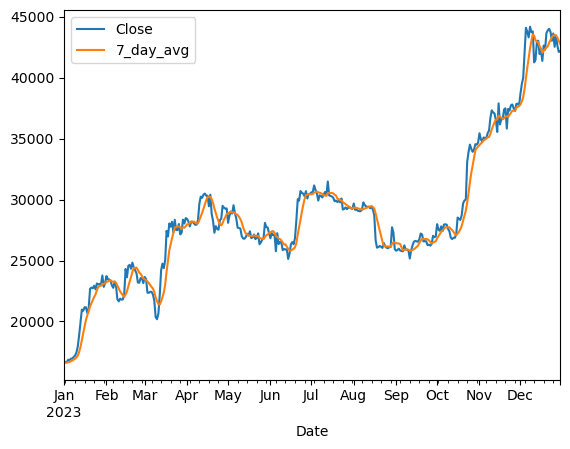

In [24]:
# 7_day rolling average
df["7_day_avg"]=df["Close"].rolling(window=7).mean()
df[["Close","7_day_avg"]].loc["2023"].plot()

In [27]:
#finding the highest average month
df.resample("M").mean()["Close"].idxmax()

/var/folders/x9/nbzvhm457yj8ldbyf88tpb0m0000gn/T/ipykernel_40969/2493149176.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample("M").mean()["Close"].idxmax()


Timestamp('2021-11-30 00:00:00')

In [32]:
#Calculating daily returns

df["daily_returns"]=df["Close"].pct_change()*100

In [35]:
df[abs(df["daily_returns"])>10].head()

,Open,High,Low,Close,Adj Close,Volume,7_day_avg,daily_returns
Date,,,,,,,,
2014-11-12,367.984985,429.717987,367.984985,423.561005,423.561005,45783200,365.519579,15.193570
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400,310.171718,-10.776686
2015-01-13,267.394012,268.277008,219.906006,225.860992,225.860992,72843904,271.743853,-15.659308
2015-01-14,223.893997,223.893997,171.509995,178.102997,178.102997,97638704,255.138994,-21.144862
2015-01-15,176.897003,229.067001,176.897003,209.843994,209.843994,81773504,244.638280,17.821709


<Axes: title={'center': 'Daily_Closing_Price'}, xlabel='Date'>

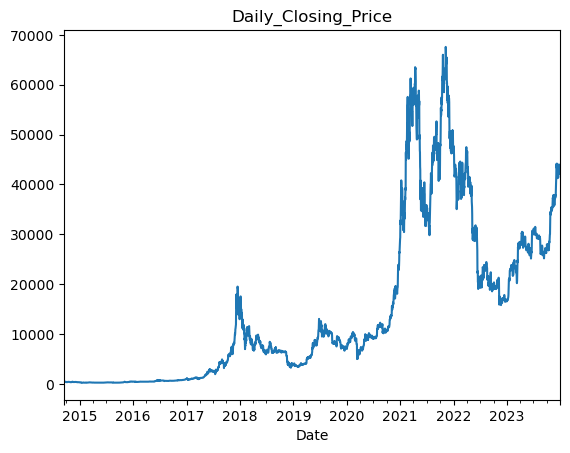

In [37]:
#Data Viz

df["Close"].plot(title="Daily_Closing_Price")

<Axes: xlabel='Date'>

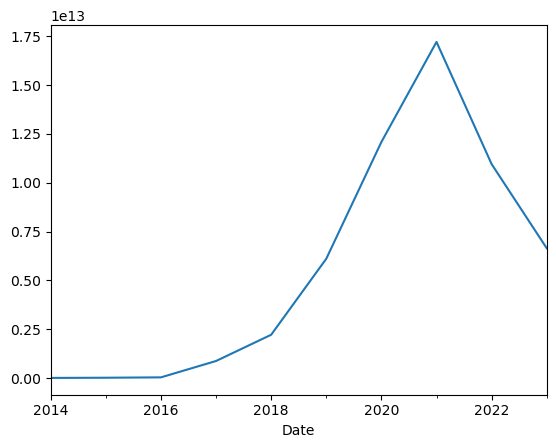

In [39]:
#Plot the yearly volume
df.resample("YE").sum()['Volume'].plot()

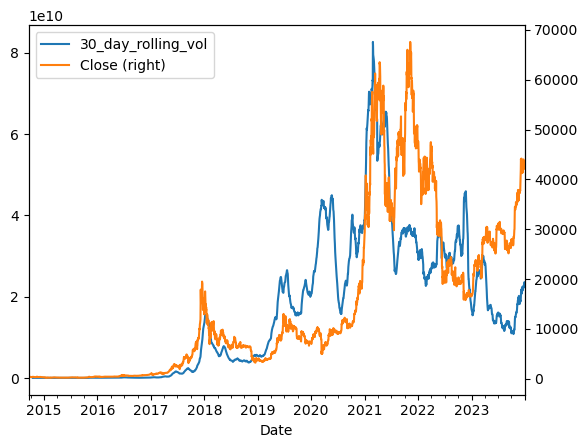

In [43]:
#PLot the Closing Price and 30 day rolling volume 
df["30_day_rolling_vol"]=df["Volume"].rolling(window=30).mean()
df["30_day_rolling_vol"].plot(legend=True)
ax=df["Close"].plot(secondary_y=True,legend=True)


In [47]:
#Data Manipulation
df.isnull().sum()
df["30_day_rolling_vol"].bfill(inplace=True)

In [48]:
df.isnull().sum()

Open                  0
High                  0
Low                   0
Close                 0
Adj Close             0
Volume                0
7_day_avg             6
daily_returns         1
30_day_rolling_vol    0
dtype: int64

In [52]:
df["7_day_avg"].interpolate(inplace=True)

/var/folders/x9/nbzvhm457yj8ldbyf88tpb0m0000gn/T/ipykernel_40969/3356806385.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["7_day_avg"].interpolate(inplace=True)


In [59]:
df["Month"]=df.index.month
df["Year"]=df.index.year
df["Day"]=df.index.day
df["Weekday"]=df.index.day_name()
df["weekday_numeric"]=df.index.weekday
df["is_weeknd"]=df.index.weekday>4

In [60]:
df

,Open,High,Low,Close,Adj Close,Volume,7_day_avg,daily_returns,30_day_rolling_vol,Month,Year,Day,Weekday,weekday_numeric,is_weeknd
Date,,,,,,,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,NaN,NaN,3.624856e+07,9,2014,17,Wednesday,2,False
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,NaN,-7.192558,3.624856e+07,9,2014,18,Thursday,3,False
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,NaN,-6.984265,3.624856e+07,9,2014,19,Friday,4,False
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,NaN,3.573492,3.624856e+07,9,2014,20,Saturday,5,True
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,NaN,-2.465854,3.624856e+07,9,2014,21,Sunday,6,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,43599.847656,43603.175781,41676.488281,42520.402344,42520.402344,30026850982,43486.929688,-2.505525,2.315280e+10,12,2023,26,Tuesday,1,False
2023-12-27,42518.468750,43683.160156,42167.582031,43442.855469,43442.855469,25260941032,43457.016183,2.169436,2.336140e+10,12,2023,27,Wednesday,2,False
2023-12-28,43468.199219,43804.781250,42318.550781,42627.855469,42627.855469,22992093014,43279.688058,-1.876028,2.340460e+10,12,2023,28,Thursday,3,False


In [70]:
#feature engineering lagged values
df["closed_lag1"]=df["Close"].shift(1)
df["closed_lag2"]=df["Close"].shift(2)

In [72]:
#SEASONALITY

/var/folders/x9/nbzvhm457yj8ldbyf88tpb0m0000gn/T/ipykernel_40969/4158562357.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  month_plot(df["Close"].resample("M").mean())


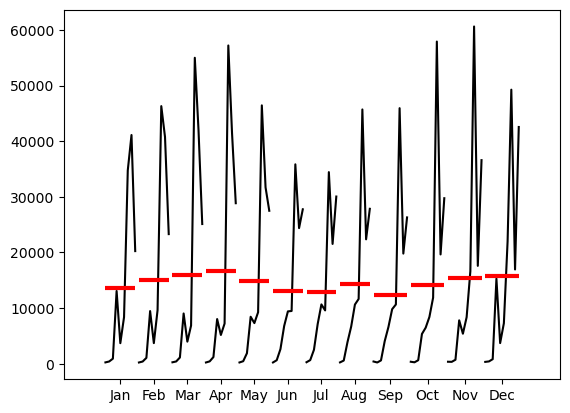

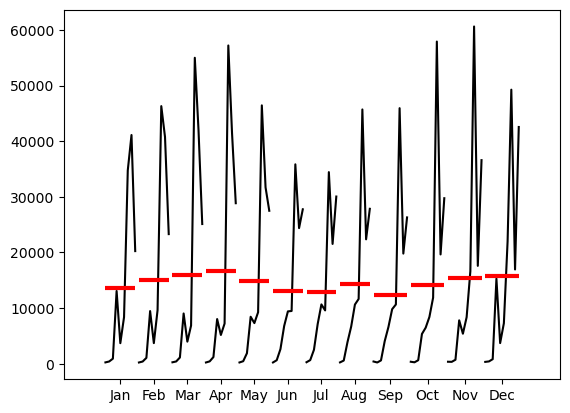

In [73]:
from statsmodels.graphics.tsaplots import month_plot,quarter_plot

month_plot(df["Close"].resample("M").mean())

In [74]:
# SEASONAL DECOMPOSITION

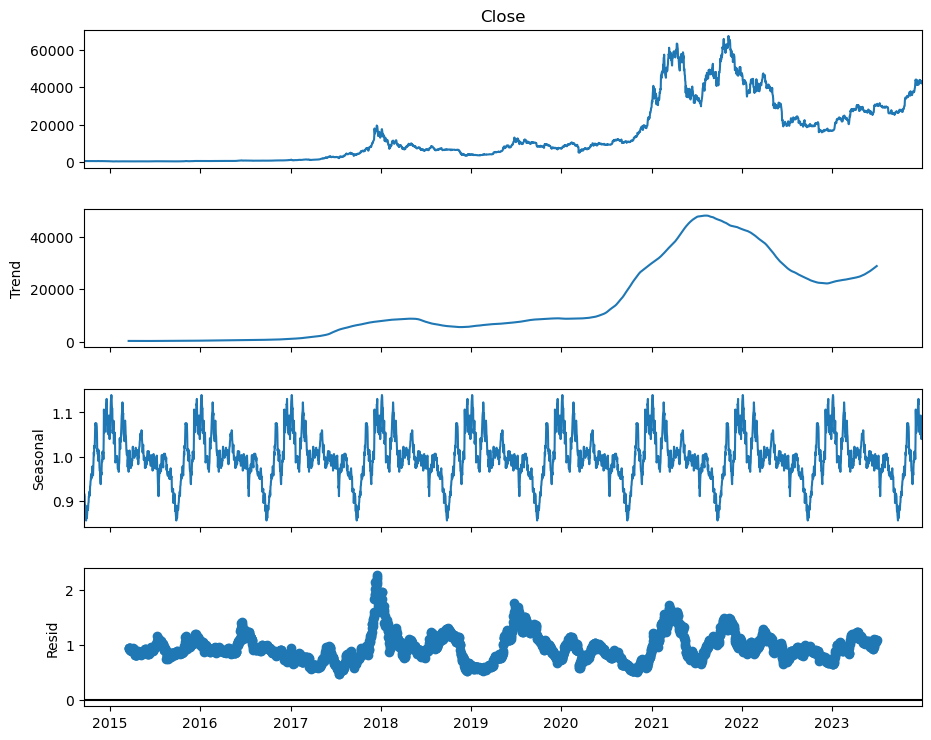

In [83]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose=seasonal_decompose(df["Close"]
                             ,model="multiplicative"
                             ,period=365)
fig=decompose.plot()
fig.set_size_inches(10,8)
plt.show()


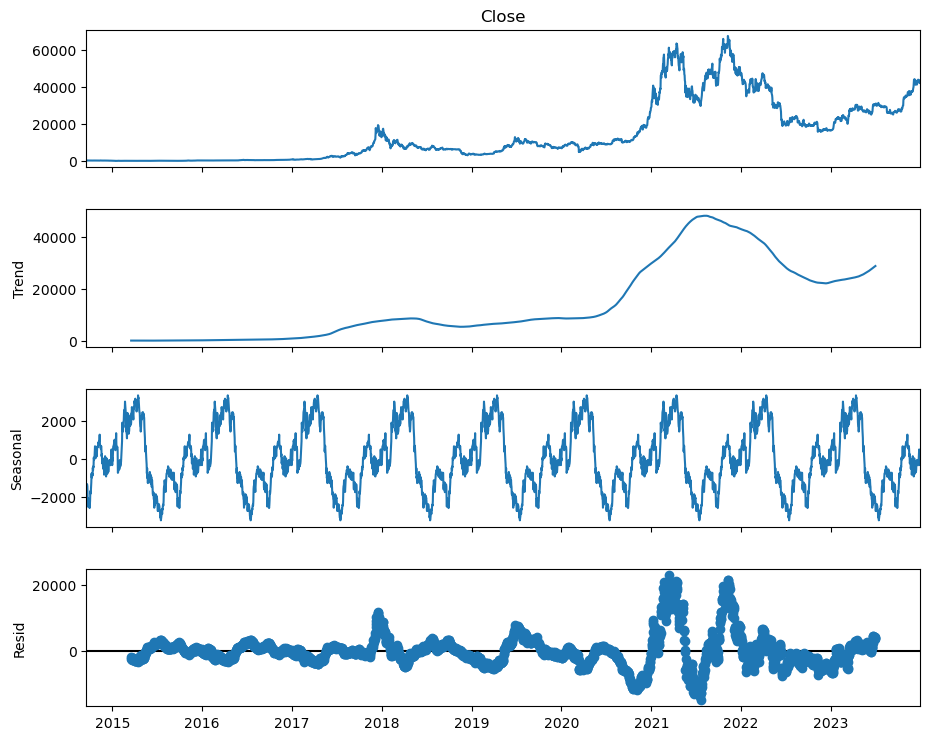

In [84]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose=seasonal_decompose(df["Close"]
                             ,model="add"
                             ,period=365)
fig=decompose.plot()
fig.set_size_inches(10,8)
plt.show()


In [85]:
# AUTOCORRELATION FUNCTION

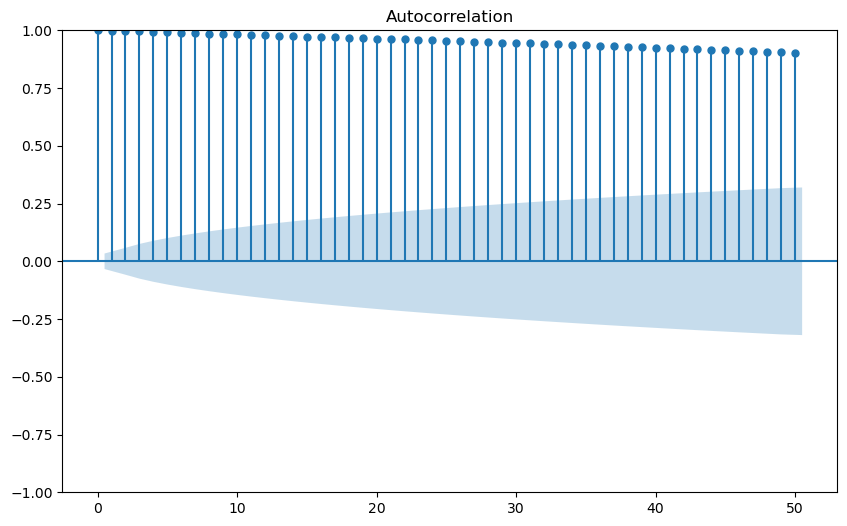

In [91]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig,ax=plt.subplots(figsize=(10,6))
plot_acf(df["Close"],lags=50,ax=ax)
plt.show()

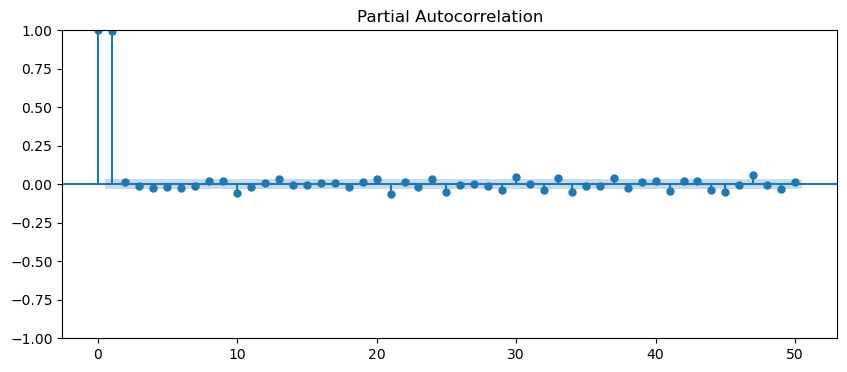

In [93]:
fig,ax=plt.subplots(figsize=(10,4))
plot_pacf(df["Close"],lags=50,ax=ax)
plt.show()